In [1]:
import pandas as pd 
import numpy as np

In [2]:
landregister_1740 = pd.read_csv("../public/data_raw/1740_Catastici_2025-09-24.tsv", sep="\t", index_col=0)
display(landregister_1740)

,uid,author,owner_code,owner_count,PP_OwnerCode,PP_OwnerCode_SIMPL,owner_name,ten_name,function,an_rendi,...,PP_Function_GEOMETRY,PP_Bottega_STD,PP_Bottega_COUNT,PP_Bottega_TRAD,PP_Bottega_METACATEGORY,PP_Owner_Title,PP_Owner_Entity,PP_Owner_FirstName,PP_Owner_LastName,PP_Owner_Notes
0,AGN-0001,Davide Drago,PPL,1,Private,Private,Paolina Franco,NaN,casa in soler rovinosa,NaN,...,SOLER,NaN,NaN,NaN,NaN,NaN,NaN,Paolina,FRANCO,PERSON
1,AGN-0002,Davide Drago,PPL,1,Private,Private,Nobil homo Andrea Vendramin,Francesco Palamon,casa in soler,22,...,SOLER,NaN,NaN,NaN,NaN,NOBIL HOMO,NaN,Andrea,VENDRAMIN,PERSON
2,AGN-0003,Davide Drago,PPL,1,Private,Private,Nobil homo Andrea Vendramin,Rovo Bognolo,casa in soler,32,...,SOLER,NaN,NaN,NaN,NaN,NOBIL HOMO,NaN,Andrea,VENDRAMIN,PERSON
3,AGN-0004,Davide Drago,PPL,1,Private,Private,Nobil homo Andrea Vendramin,Zuanne Fanti,casa in soler,28,...,SOLER,NaN,NaN,NaN,NaN,NOBIL HOMO,NaN,Andrea,VENDRAMIN,PERSON
4,AGN-0005,Davide Drago,PPL,1,Private,Private,Nobil homo Andrea Vendramin,Michiel Gasparini,casa in soler,18,...,SOLER,NaN,NaN,NaN,NaN,NOBIL HOMO,NaN,Andrea,VENDRAMIN,PERSON
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
31738,ZUL-0507,Francesca Zugno,PPL,1,Private,Private,Alvise Mocenigo,Vicenzo Albrizzi,Bottega sola,15,...,NaN,NaN,0.0,NaN,NaN,NaN,NaN,Alvise,MOCENIGO,PERSON
31739,ZUL-0508,Francesca Zugno,PPL,1,Private,Private,Alvise Mocenigo,Ambroso Busi,Appartamento di Casa di sopra,33,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Alvise,MOCENIGO,PERSON
31740,ZUL-0509,Francesca Zugno,PPL,1,Private,Private,Alvise Mocenigo,Antonio Giuliani,Appartamento di casa di sotto,42,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Alvise,MOCENIGO,PERSON
31741,ZUL-0510,Francesca Zugno,PPL,1,Private,Private,Alvise Mocenigo,Antonio Berti,Bottega sola,15,...,NaN,NaN,0.0,NaN,NaN,NaN,NaN,Alvise,MOCENIGO,PERSON


In [ ]:
# create dataframe with duplicated tenants grouped by normalized tenant name
ten = landregister_1740["ten_name"]

ten_norm = (
    ten.where(ten.notna())    # keep NaN as NaN so they are not counted
    .str.strip()
    .str.lower()
    .replace("", pd.NA)       # treat empty strings as NaN
)

# names that occur more than once (excluding NaN)
counts = ten_norm.dropna().value_counts()
dup_names = counts[counts > 1].index.tolist()

# dataframe only with duplicated tenants, and add normalized name column
dup_df = landregister_1740[ten_norm.isin(dup_names)].copy()
dup_df["ten_name_norm"] = ten_norm.loc[dup_df.index]
dup_df.drop(columns=["author","owner_code","owner_count","place","PP_OwnerCode","PP_OwnerCode_SIMPL","an_rendi","id_napo","quantity_income","quality_income","parish_std","sestiere","PP_Function_TOP","PP_Function_MID","PP_Function_PROPERTY", "PP_Function_GEOMETRY","PP_Owner_Title","PP_Owner_Entity","PP_Owner_FirstName","PP_Owner_LastName","PP_Owner_Notes"], inplace=True)

display(dup_df)

,uid,owner_name,ten_name,function,PP_Bottega_STD,PP_Bottega_COUNT,PP_Bottega_TRAD,PP_Bottega_METACATEGORY,ten_name_norm
1,AGN-0002,Nobil homo Andrea Vendramin,Francesco Palamon,casa in soler,NaN,NaN,NaN,NaN,francesco palamon
5,AGN-0006,Nobil homo Andrea Vendramin,Giovanni Battista Carleschi,casa in soler,NaN,NaN,NaN,NaN,giovanni battista carleschi
6,AGN-0007,Nobil homo Andrea Vendramin,Francesco Martini,casa in soler,NaN,NaN,NaN,NaN,francesco martini
12,AGN-0013,Innocente Nastasi,Antonio Buranello,casa pepian,NaN,NaN,NaN,NaN,antonio buranello
15,AGN-0016,Testa Ruinato,Gasparo Moro,casa soler,NaN,NaN,NaN,NaN,gasparo moro
...,...,...,...,...,...,...,...,...,...
31731,ZUL-0502a,"Piero Antonio Morari, e Fratelli Porta",Zuanne Padoan,"Casa, e Bottega",NaN,0.0,NaN,NaN,zuanne padoan
31732,ZUL-0502b,Gierolamo Michieli,Zuanne Padoan,"Casa, e Bottega",NaN,0.0,NaN,NaN,zuanne padoan
31734,ZUL-0504a,"Piero Morari, e Sorelle Porta",Andrea Arquin,Bottega in due porzioni,NaN,0.0,NaN,NaN,andrea arquin
31735,ZUL-0504b,"NULLCostanza, e Figlia Michieli",Andrea Arquin,Bottega in due porzioni,NaN,0.0,NaN,NaN,andrea arquin


In [38]:
# check duplicates in ten_name
# normalize ten_name then count duplicates
landregister_1740["ten_name_norm"] = (
    landregister_1740["ten_name"]
    .where(landregister_1740["ten_name"].notna())       
    .astype(str)
    .str.strip()
    .str.lower()
)

# counts and duplicates
counts = landregister_1740["ten_name_norm"].value_counts()
duplicates = counts[counts > 1]

print(f"Total unique ten_name (normalized): {counts.size}")
print(f"Names that appear more than once: {len(duplicates)}")
display(duplicates.head(50))   # show top duplicates

# show example rows for duplicated names (first 100 rows)
dup_names = duplicates.index.tolist()
examples = landregister_1740[landregister_1740["ten_name_norm"].isin(dup_names)].sort_values("ten_name_norm")
display(examples.head(100))

Total unique ten_name (normalized): 23899
Names that appear more than once: 3040


ten_name_norm
nan                                  2876
antonio rossi                          23
antonio calvi                          19
vuota                                  18
francesco rossi                        17
bortolo usabelli                       16
zuanne bettini                         15
francesco zancarelli                   14
francesco berti                        14
zuanne martini                         13
inaffittato                            12
andrea de pian                         11
paolo petregali pistor                 11
antonio millesi                        11
zuanne astori                          11
giovanni maria pezzoli pistor          11
domenico girardi                       11
inafittata                             11
domenico bianchi                       11
giovanni battista curti                11
luca baeni                             11
antonio venturini                      10
inaffittata                            10
francesco calvi     

,uid,author,owner_code,owner_count,PP_OwnerCode,PP_OwnerCode_SIMPL,owner_name,ten_name,function,an_rendi,...,PP_Bottega_STD,PP_Bottega_COUNT,PP_Bottega_TRAD,PP_Bottega_METACATEGORY,PP_Owner_Title,PP_Owner_Entity,PP_Owner_FirstName,PP_Owner_LastName,PP_Owner_Notes,ten_name_norm
16938,MLN-0240a,Francesca Zugno,PPL_m,1,Private,Private,Heredi Zuanne Battista Be[n]ini,[Zanetto] Cironi,Inviamento,22,...,NaN,NaN,NaN,NaN,NaN,NaN,Zuanne Battista,NaN,PERSON,[zanetto] cironi
16939,MLN-0240b,Francesca Zugno,PPL,1,Private,Private,Chiara Capis Zanetti,[Zanetto] Cironi,Casa e Bothega Luganegher,46,...,NaN,NaN,NaN,NaN,NaN,NaN,Chiara,CAPIS ZANETTI,PERSON,[zanetto] cironi
10990,GHV-0133,Davide Drago,PPL,1,Private,Private,Brunetta q. Marco Coen,Abram Cessi,magazen,23,...,NaN,NaN,NaN,NaN,NaN,NaN,Brunetta Marco,COEN,PERSON,abram cessi
10998,GHV-0141,Davide Drago,PPL,1,Private,Private,Emanuel Baruch,Abram Cessi,"casa, primo soler",25,...,NaN,NaN,NaN,NaN,NaN,NaN,Emanuel,BARUCH,PERSON,abram cessi
11174,GHV-0317,Davide Drago,PPL,1,Private,Private,Rafael Albegnacan,Abram Parenzo,"casa, sesto soler",20,...,NaN,NaN,NaN,NaN,NaN,NaN,Rafael,ALBEGNACAN,PERSON,abram parenzo
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20526,NCL-0523,Francesca Zugno,PPL,1,Private,Private,Ottavio Alciati uxorio nomine,Alvise Dabalao,In detta casa soler di mezo,48 lire,...,NaN,NaN,NaN,NaN,NaN,NaN,Ottavio,ALCIATI,PERSON,alvise dabalao
21206,NCL-1195,Francesca Zugno,PPL,1,Private,Private,Zuanne Pasini,Alvise Dabalao,Casa in soler,18,...,NaN,NaN,NaN,NaN,NaN,NaN,Zuanne,PASINI,PERSON,alvise dabalao
22908,PCS-1663,Davide Drago,PPL,1,Private,Private,Nobil homo Grimani dei Servi,Alvise de Parisi,"squero, bottega da tagier",26,...,TAGIER,1.0,(Person) Cutting,SERVICES,NOBIL HOMO,NaN,NaN,GRIMANI SERVI,PERSON,alvise de parisi
22712,PCS-1457,Davide Drago,PPL,1,Private,Private,Carlo Altieri,Alvise De Parisi,"casa, squero",85,...,NaN,NaN,NaN,NaN,NaN,NaN,Carlo,ALTIERI,PERSON,alvise de parisi


In [39]:
# group the duplicated tenants by normalized name
# keep only groups where: at least one row has non-null PP_Bottega_STD

grouped = dup_df.groupby("ten_name_norm")

def keep_group(g: pd.DataFrame) -> bool:
    has_bottega = g["PP_Bottega_STD"].notna().any()
    return has_bottega 

kept_groups = {name: grp for name, grp in grouped if keep_group(grp)}

# display kept groups and count
print(f"Total number of duplicated-tenant groups kept: {len(kept_groups)}")
# for name, group in kept_groups.items():
#     print(f"Tenant Name (normalized): {name}")
#     display(group)


Total number of duplicated-tenant groups kept: 968


In [ ]:
import folium
import geopandas as gpd
import matplotlib.pyplot as plt
from shapely.geometry import Point


# filter Antonio Rossi
ar = kept_groups['antonio rossi']


ar_shops = ar[ar["PP_Bottega_STD"].notna()]

ar_houses = ar[ar["PP_Bottega_STD"].isna()]

# Convert the CRS to WGS84 (Leaflet requires lat/lon)
df_ar_houses = ar_houses.to_crs(epsg=4326)
df_ar_shops = ar_shops.to_crs(epsg=4326)

# Center on the mean location of his houses
mean_lat = df_ar_houses.geometry.y.mean()
mean_lon = df_ar_houses.geometry.x.mean()

m = folium.Map(location=[mean_lat, mean_lon], zoom_start=15, 
tiles = "https://geo-timemachine.epfl.ch/geoserver/www/tilesets/venice/sommarioni/{z}/{x}/{y}.png", attr='Sommarioni')

# Add each house as a marker
for idx, row in df_ar_houses.iterrows():
    lat = row.geometry.y
    lon = row.geometry.x
    
    folium.CircleMarker(
        location=[lat, lon],
        radius=6,
        color="red",
        fill=True,
        fill_opacity=0.9,
        popup=f"House {idx}"
    ).add_to(m)

for idx, row in df_ar_shops.iterrows():
    lat = row.geometry.y
    lon = row.geometry.x
    
    folium.CircleMarker(
        location=[lat, lon],
        radius=6,
        color="blue",
        fill=True,
        fill_opacity=0.9,
        popup=f"Shop {idx}, {row.PP_Bottega_TRAD}"
    ).add_to(m)

m


## Owners and tenants

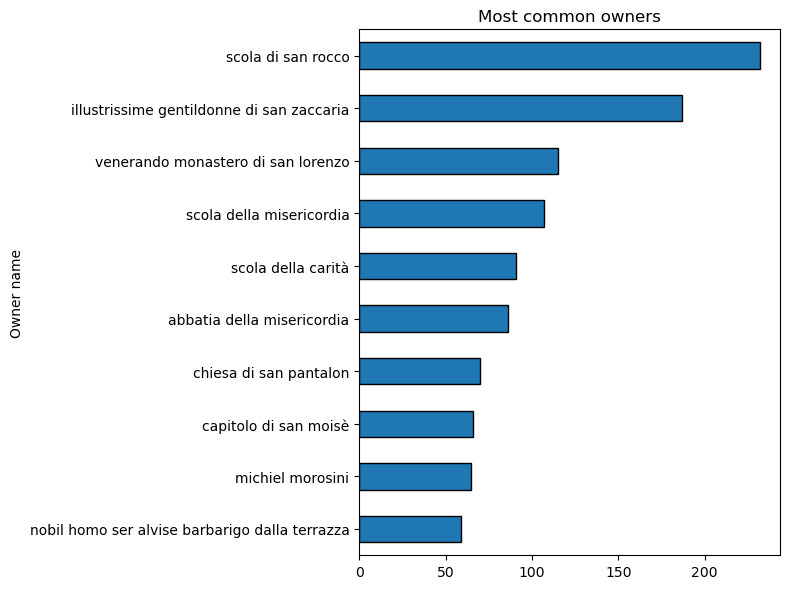

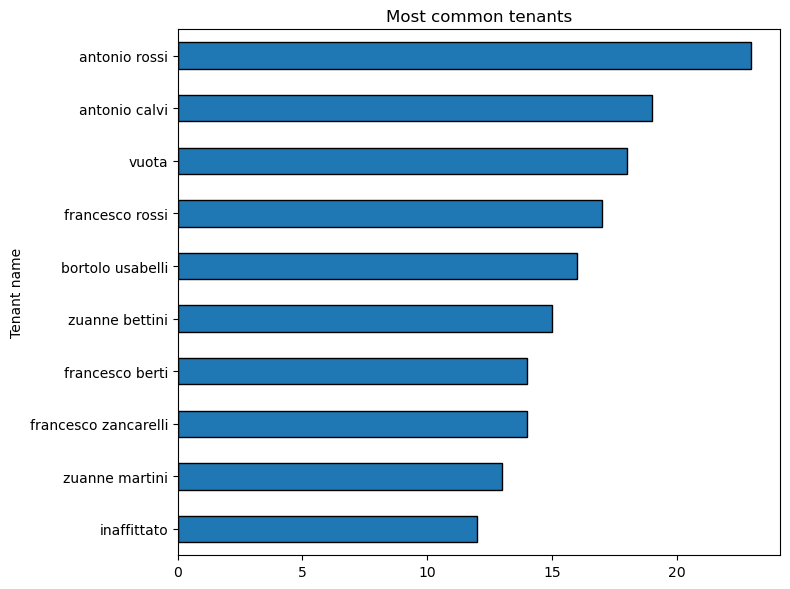

In [39]:
landregister_1740["ten_name_norm"] = (
    landregister_1740["ten_name"]
    .where(landregister_1740["ten_name"].notna())       
    .astype(str)
    .str.strip()
    .str.lower()
)
landregister_1740["owner_name_norm"] = (
    landregister_1740["owner_name"]
    .where(landregister_1740["owner_name"].notna())       
    .astype(str)
    .str.strip()
    .str.lower()
)

counts = landregister_1740["owner_name_norm"].dropna().value_counts()
import matplotlib.pyplot as plt
fig, ax = plt.subplots(figsize=(8, 6))
counts[1:11].sort_values().plot(kind="barh", ax=ax, edgecolor="black")
ax.set_ylabel("Owner name")
ax.set_title("Most common owners")
plt.tight_layout()
plt.show()

counts = landregister_1740["ten_name_norm"].dropna().value_counts()
import matplotlib.pyplot as plt
fig, ax = plt.subplots(figsize=(8, 6))
counts[1:11].sort_values().plot(kind="barh", ax=ax, edgecolor="black")
ax.set_ylabel("Tenant name")
ax.set_title("Most common tenants")
plt.tight_layout()
plt.show()


In [50]:
landregister_1740[landregister_1740["ten_name_norm"] == "antonio rossi"]

,uid,author,owner_code,owner_count,PP_OwnerCode,PP_OwnerCode_SIMPL,owner_name,ten_name,function,an_rendi,...,PP_Bottega_COUNT,PP_Bottega_TRAD,PP_Bottega_METACATEGORY,PP_Owner_Title,PP_Owner_Entity,PP_Owner_FirstName,PP_Owner_LastName,PP_Owner_Notes,ten_name_norm,owner_name_norm
287,AGN-0288,Davide Drago,PPL,1,Private,Private,Lunardo Donà,Antonio Rossi,casa soler,74,...,NaN,NaN,NaN,NaN,NaN,Lunardo,DONA,PERSON,antonio rossi,lunardo donà
2483,BLD-0029,Francesca Zugno,PPL,1,Private,Private,Costantin Loredan,Antonio Rossi,Casa a pepian,24,...,NaN,NaN,NaN,NaN,NaN,Costantin,LOREDAN,PERSON,antonio rossi,costantin loredan
4902,CRO-0065,Francesca Zugno,PPL,1,Private,Private,Marin Ventura,Antonio Rossi,Casa,20,...,NaN,NaN,NaN,NaN,NaN,Marin,VENTURA,PERSON,antonio rossi,marin ventura
5267,CRO-0419,Francesca Zugno,PPL,1,Private,Private,Eminentissimo Cardinal Ottobon,Antonio Rossi,Casa,32,...,NaN,NaN,NaN,EMINENTISSIMO CARDINALE,NaN,NaN,OTTOBON,PERSON,antonio rossi,eminentissimo cardinal ottobon
6066,CSS-0425,Davide Drago,PPL,1,Private,Private,Nobil homo Anzolo Grassi,Antonio Rossi,casa,50,...,NaN,NaN,NaN,NOBIL HOMO,NaN,Anzolo,GRASSI,PERSON,antonio rossi,nobil homo anzolo grassi
7844,GDO-0212,Davide Drago,PPL,1,Private,Private,Domenico Franceschi,Antonio Rossi,NaN,24,...,NaN,NaN,NaN,NaN,NaN,Domenico,FRANCESCHI,PERSON,antonio rossi,domenico franceschi
14084,MFO-0383,Davide Drago,PPL,1,Private,Private,Nobil homo Zuane Donà,Antonio Rossi,casa,35,...,NaN,NaN,NaN,NOBIL HOMO,NaN,Zuane,DONA,PERSON,antonio rossi,nobil homo zuane donà
19342,MSE-0811a,Davide Drago,PPL,1,Private,Private,Zuanne Gradenigo de Vincenzo,Antonio Rossi,bottega da sartor e casa,49,...,1.0,(Person) Tailor,COMMERCE_CLOTHING,NaN,NaN,Zuanne,GRADENIGO DE VINCENZO,PERSON,antonio rossi,zuanne gradenigo de vincenzo
19343,MSE-0811b,Davide Drago,PPL_m,2,Private,Private,Piero procuratore pro tempore di Vito e Modest...,Antonio Rossi,bottega da sartor e casa,46,...,1.0,(Person) Tailor,COMMERCE_CLOTHING,"PROCURATORE,_",NaN,"Piero,Modesto","DE PICCOLI,DE PICCOLI",PERSON,antonio rossi,piero procuratore pro tempore di vito e modest...
19344,MSE-0811c,Davide Drago,PPL,1,Private,Private,Bortolo Tolusi,Antonio Rossi,bottega da sartor e casa,46,...,1.0,(Person) Tailor,COMMERCE_CLOTHING,NaN,NaN,Bortolo,TOLUSI,PERSON,antonio rossi,bortolo tolusi


## Shop types and numbers

PP_Bottega_TRAD
(Person) Fruits                                                                                      230
(Person) Shoes                                                                                       208
(Person) Sausage                                                                                     186
(Person) Barber                                                                                      183
(Object) Jewellery                                                                                   145
                                                                                                    ... 
(Person) Turner,(Person) Tailor                                                                        1
(Person) Turner,(Person) Gilder                                                                        1
(Person) Wood sculpting,(Person) Vegetables                                                            1
(Person) Book binder / large-object pac

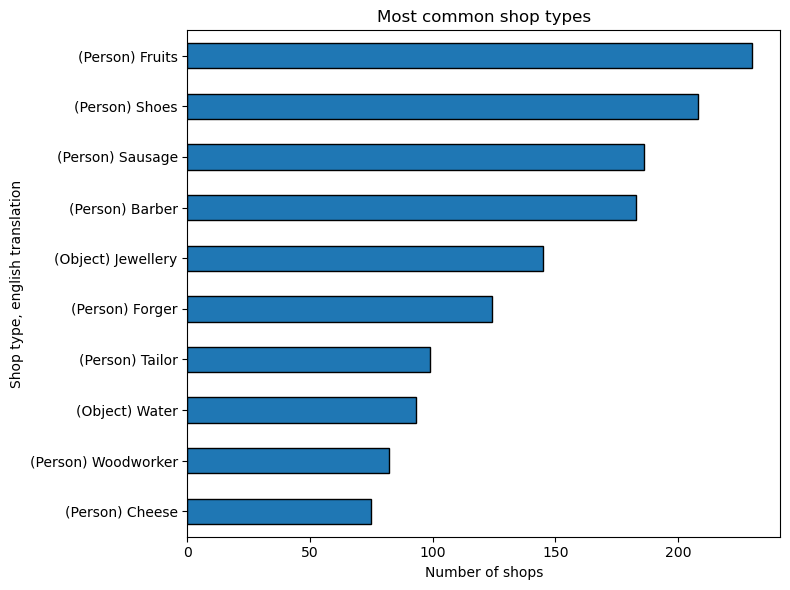

In [35]:
counts = landregister_1740["PP_Bottega_TRAD"].dropna().value_counts()
display(counts)

import matplotlib.pyplot as plt
fig, ax = plt.subplots(figsize=(8, 6))
counts[:10].sort_values().plot(kind="barh", ax=ax, edgecolor="black")
ax.set_xlabel("Number of shops")
ax.set_ylabel("Shop type, english translation")
ax.set_title("Most common shop types")
plt.tight_layout()
plt.show()


In [3]:
merchants = pd.read_parquet("../public/data/merchants_dataset.parquet")
merchants.head()

,person,shop_count,shop_type,shop_type_eng,shop_category,shop_lat,shop_lng,house_lat,house_lng
0,Agostin Cigaggia,1,[FORMAGIER],[(Person) Cheese],[FOOD_DRINK],[5035730.88015714],[290857.01847614034],5.035731e+06,290857.018476
1,Agostin Fabris,1,[FORNER],[(Person) Oven],[FOOD_DRINK],[5035118.308935367],[292354.62244628853],5.035118e+06,292354.622446
2,Agostin Lazari,1,[FABRO],[(Person) Forger],[METAL_CRAFT],[5035133.210374592],[291466.5331725447],5.035004e+06,291898.158642
3,Agostin Meneghetti,1,[ORESE],[(Object) Jewellery],[LUXURY_ITEMS],[5035425.966183828],[291536.64384332683],5.035484e+06,291391.043150
4,Agostin Redolfi,2,"[SCALETER, SCALETER]","[(Person) Pastries, (Person) Pastries]","[FOOD_DRINK, FOOD_DRINK]","[5035236.682245659, 5035237.392795577]","[291390.2704865179, 291389.2441296375]",5.035237e+06,291390.270487


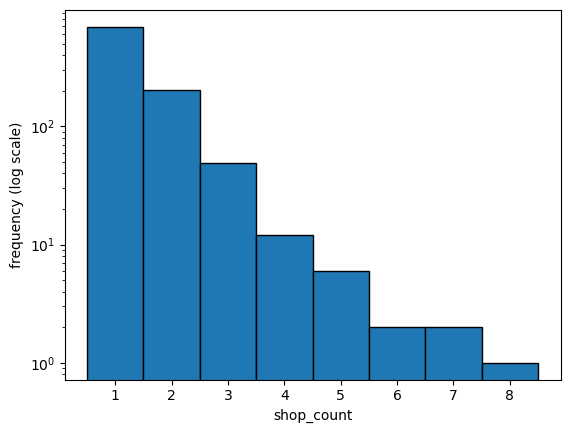

In [18]:
import matplotlib.pyplot as plt
import numpy as np

s = merchants["shop_count"].dropna().astype(int)
minv, maxv = s.min(), s.max()

# create half-step bins so bars are centered on integers
bins = np.arange(minv - 0.5, maxv + 1.5, 1)

fig, ax = plt.subplots()
ax.hist(s, bins=bins, log=True, edgecolor="black")
ax.set_xticks(np.arange(minv, maxv + 1))   # tick positions under bars (integer centers)
ax.set_xlabel("shop_count")
ax.set_ylabel("frequency (log scale)")
plt.show()

In [25]:
# shop types for merchants with shop_count > 3
df = merchants[merchants["shop_count"] > 3].copy()
counts = df["shop_type_eng"].value_counts()
display(counts)


shop_type_eng
[(Object) Jewellery, (Object) Jewellery, (Object) Jewellery, (Object) Jewellery, (Object) Jewellery]                                                                                                                              1
[(Person) Cheese, (Person) Cheese, (Person) Cheese, (Person) Cheese, (Person) Cheese, (Person) Cheese, (Person) Cheese, (Person) Cheese]                                                                                          1
[(Person) Oranges, (Person) Oranges, (Person) Oranges, (Person) Oranges]                                                                                                                                                          1
[(Person) Cold meats,(Person) Fruits, (Person) Cold meats,(Person) Fruits, (Person) Cold meats,(Person) Fruits, (Person) Cold meats,(Person) Fruits, (Person) Cold meats,(Person) Fruits, (Person) Cold meats,(Person) Fruits]    1
[(Person) Tailor, (Person) Tailor, (Person) Tailor, (Person) Tailor, (Pers